Using  PyTorch for a 3D bin packing optimization problem, but there are some considerations you should keep in mind when trying to adapt PyTorch to solve combinatorial optimization problems like bin packing.
How to Approach 3D Bin Packing with PyTorch

    Problem Formulation: The goal of 3D bin packing is to optimally fit a set of 3D items (each defined by length, width, and height) into a minimal number of 3D bins (containers) of fixed size, while respecting item orientations and bin dimensions.

    PyTorch as a Tool: PyTorch is a deep learning framework, which means it is well-suited for problems that involve learning from data, optimizing with gradient-based techniques, and solving problems like classification, regression, or other types of machine learning tasks. However, bin packing is a combinatorial optimization problem, not a continuous optimization problem (like those commonly handled by neural networks).

Possible Approaches Using PyTorch:
1. Reinforcement Learning (RL):

One of the approaches you could consider is using Reinforcement Learning (RL). In this case, PyTorch could help you train a neural agent to learn how to pack items into bins. This involves framing the bin packing problem as an RL task, where:

    State: The current configuration of the bins and items (e.g., remaining space in bins, item dimensions).

    Action: Placement of an item in one of the bins (which could involve selecting an item and deciding its position).

    Reward: The reward function could be designed to encourage packing efficiency, such as minimizing the total number of bins used.

In this case, you would build a model using PyTorch to handle the state-action value function (Q-function) or even deep Q-networks (DQN).
2. Neural Network-based Optimization (Genetic Algorithms):

While PyTorch is typically used for deep learning, you can also combine it with other optimization algorithms like Genetic Algorithms (GA). The idea is to represent the packing solution (the placement of items into bins) as chromosomes in a GA population and evolve the population to find the optimal solution. Neural networks could be used as part of the GA, such as using them to guide selection or mutation operations.
3. Autoencoders for Feature Extraction:

In some optimization problems, you might be able to use autoencoders in PyTorch to perform dimensionality reduction or feature extraction, which could help guide search heuristics or improve the decision-making process for which bins to pack in an optimal order.
4. Custom Search Algorithms (e.g., Simulated Annealing):

You could build custom search algorithms in PyTorch for bin packing. For example, Simulated Annealing, or other techniques like Tabu Search or Hill Climbing, could be used. PyTorch would handle the algorithm logic and could provide tools for manipulating candidate solutions using tensor operations, but this approach would require you to carefully craft the algorithm.

In [1]:
! pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.8/150.8 MB 669.6 kB/s eta 0:00:0000:0100:08


In [2]:
! pip install numpy
! pip install matplotlib
! pip install pandas
! pip install seaborn
! pip install scipy
! pip install scikit-learn
! pip install torchtext
! pip install torch-vision
! pip install torch-geometric  # for graph neural networks


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 969.0 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 474.3 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 1.6 MB/s eta 0:00:00a 0:00:01


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

class BinPackingAgent(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(BinPackingAgent, self).__init__()
        self.fc1 = nn.Linear(state_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, action_dim)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define the reward function
def compute_reward(action_taken, action_dim):
    # Example logic for computing reward
    reward = torch.zeros(action_dim, dtype=torch.float32)  # Initialize a zero tensor of size action_dim
    if action_taken == 0:  # Assume action 0 is the best action
        reward[action_taken] = 1.0  # Maximum reward for the best action
    else:
        reward[action_taken] = -0.1  # Penalty for suboptimal actions
    return reward

# Example setup for the agent
state_dim = 10  # This could represent a vector of features about the state, like item placements and bin space remaining
action_dim = 6  # For example, choosing between 6 different bins or orientations

# Initialize the agent
agent = BinPackingAgent(state_dim, action_dim)

# Optimizer and loss function
optimizer = optim.Adam(agent.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

# Example of generating a random state for the environment
state = np.random.rand(state_dim)  # Random state, this should come from your bin packing problem

# Convert state to a tensor
state_tensor = torch.tensor(state, dtype=torch.float32)

# Perform a forward pass
action = agent(state_tensor)

# Select the action (could be using softmax to get probabilities or greedy strategy)
action_taken = torch.argmax(action).item()

# Compute reward (you would define this based on how well the action packed items)
reward = compute_reward(action_taken, action_dim)

# Backpropagate and optimize (a simple example)
optimizer.zero_grad()
loss = loss_fn(action, reward)  # Now both action and reward have the same size
loss.backward()
optimizer.step()

Item (6, 3, 3) does not fit in the bin!


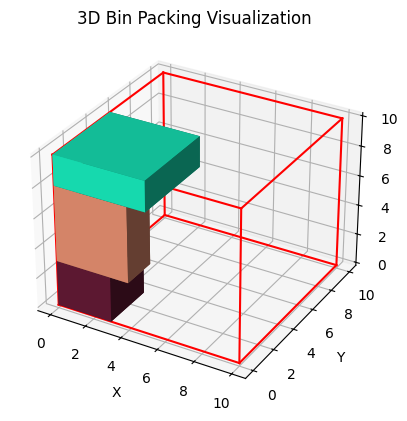

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Example bin and item dimensions (length, width, height)
bin_dim = (10, 10, 10)  # Bin size
items = [(3, 3, 3), (4, 2, 5), (5, 5, 2), (6, 3, 3)]  # List of items

# Create figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the bin (as a wireframe cube)
x = [0, bin_dim[0], bin_dim[0], 0, 0, bin_dim[0], bin_dim[0], 0]
y = [0, 0, bin_dim[1], bin_dim[1], 0, 0, bin_dim[1], bin_dim[1]]
z = [0, 0, 0, 0, bin_dim[2], bin_dim[2], bin_dim[2], bin_dim[2]]

# Define edges of the wireframe cube
edges = [
    [0, 1], [1, 2], [2, 3], [3, 0],  # Bottom face
    [4, 5], [5, 6], [6, 7], [7, 4],  # Top face
    [0, 4], [1, 5], [2, 6], [3, 7]   # Vertical edges
]

for edge in edges:
    ax.plot([x[edge[0]], x[edge[1]]], [y[edge[0]], y[edge[1]]], [z[edge[0]], z[edge[1]]], color='r')

# Plot the items (as small cubes inside the bin)
x_offset, y_offset, z_offset = 0, 0, 0
for item in items:
    # Ensure the item fits within the bin
    if z_offset + item[2] > bin_dim[2]:
        print(f"Item {item} does not fit in the bin!")
        continue

    # Plot the item as a 3D bar
    ax.bar3d(x_offset, y_offset, z_offset, item[0], item[1], item[2], shade=True, color=np.random.rand(3,))
    z_offset += item[2]  # Update z_offset to stack items vertically

# Set labels and show plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Bin Packing Visualization')
plt.show()


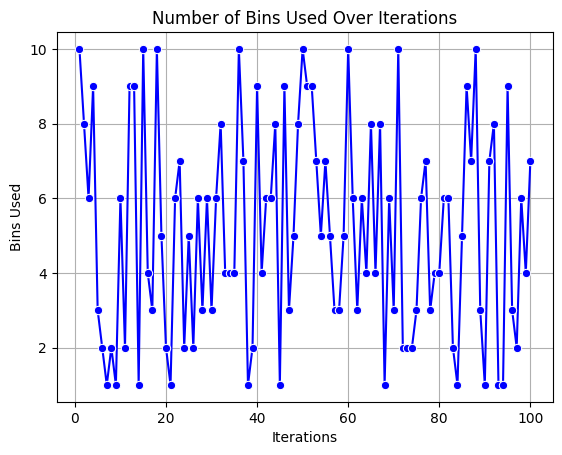

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Ensure numpy is imported

# Example data: Number of bins used over iterations
iterations = np.arange(1, 101)  # Iterations from 1 to 100
bins_used = np.random.randint(1, 11, size=100)  # Simulated bin counts for 100 iterations

# Create a seaborn line plot to show the number of bins used over time
sns.lineplot(x=iterations, y=bins_used, marker='o', color='blue')

# Adding labels and title
plt.title('Number of Bins Used Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Bins Used')
plt.grid(True)  # Add a grid for better readability
plt.show()

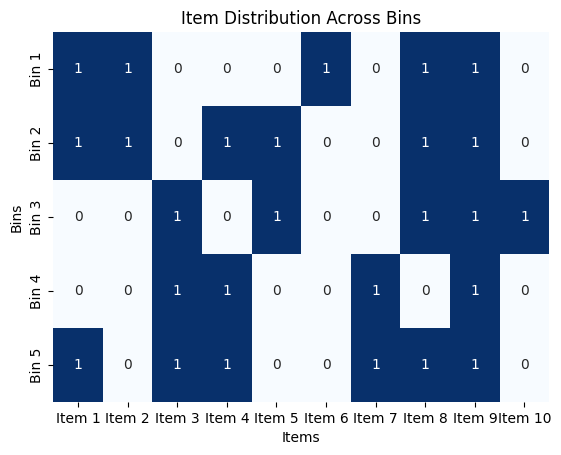

In [13]:
import seaborn as sns
import numpy as np

# Example data: Distribution of items across bins (rows: bins, columns: items in each bin)
bin_data = np.random.randint(0, 2, size=(5, 10))  # 5 bins, 10 possible items

# Create a heatmap to show how items are distributed across bins
sns.heatmap(bin_data, annot=True, cmap='Blues', cbar=False, xticklabels=[f'Item {i}' for i in range(1, 11)],
            yticklabels=[f'Bin {i}' for i in range(1, 6)])

plt.title('Item Distribution Across Bins')
plt.xlabel('Items')
plt.ylabel('Bins')
plt.show()


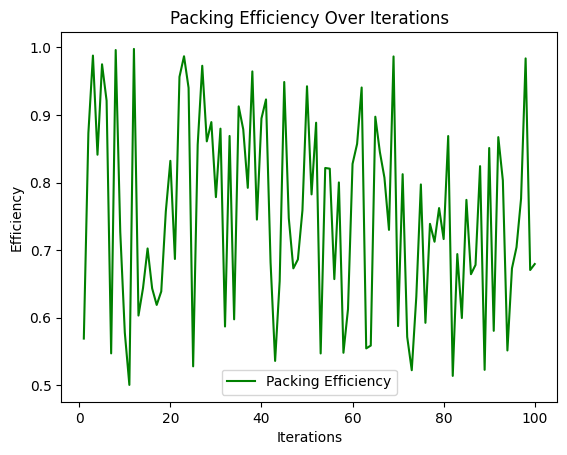

In [14]:
import matplotlib.pyplot as plt

# Example data: packing efficiency over iterations
iterations = np.arange(1, 101)
efficiency = np.random.uniform(0.5, 1.0, size=100)  # Simulated efficiency values from 50% to 100%

# Plot efficiency
plt.plot(iterations, efficiency, label='Packing Efficiency', color='green')

# Adding labels and title
plt.title('Packing Efficiency Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Efficiency')
plt.legend()
plt.show()


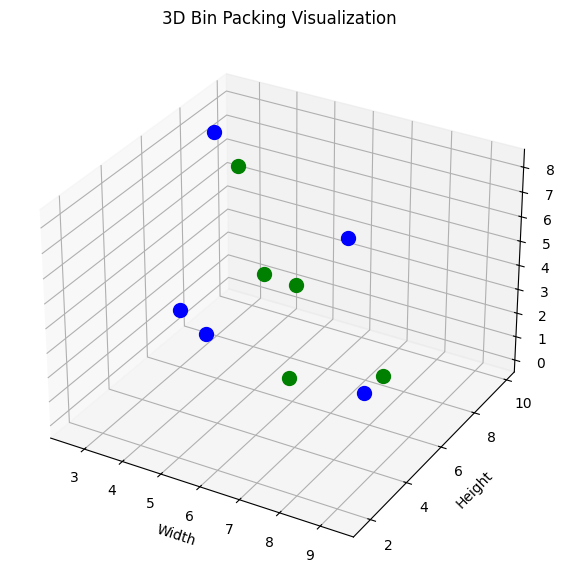

In [15]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Generate random item data (width, height, depth)
num_items = 10
item_dimensions = torch.rand((num_items, 3)) * 10  # Random dimensions between 0 and 10

# For visualization purposes, we simulate random bin assignments (e.g., 3 bins)
bin_assignments = torch.randint(0, 3, (num_items,))  # Assign random bins

# Prepare 3D plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Define colors for different bins
bin_colors = ['r', 'g', 'b']

# Plot the items in 3D space with different colors for different bins
for i in range(num_items):
    ax.scatter(item_dimensions[i, 0], item_dimensions[i, 1], item_dimensions[i, 2], 
               color=bin_colors[bin_assignments[i].item()], s=100)

# Labels and title
ax.set_xlabel('Width')
ax.set_ylabel('Height')
ax.set_zlabel('Depth')
ax.set_title('3D Bin Packing Visualization')

# Show the plot
plt.show()


Epoch 0: Loss = 2.441603899002075
Epoch 10: Loss = 0.5162550210952759
Epoch 20: Loss = 0.4958077073097229
Epoch 30: Loss = 0.42797914147377014
Epoch 40: Loss = 0.4054808020591736
Epoch 50: Loss = 0.3915475308895111
Epoch 60: Loss = 0.3774970471858978
Epoch 70: Loss = 0.3607698976993561
Epoch 80: Loss = 0.3417051136493683
Epoch 90: Loss = 0.32068443298339844


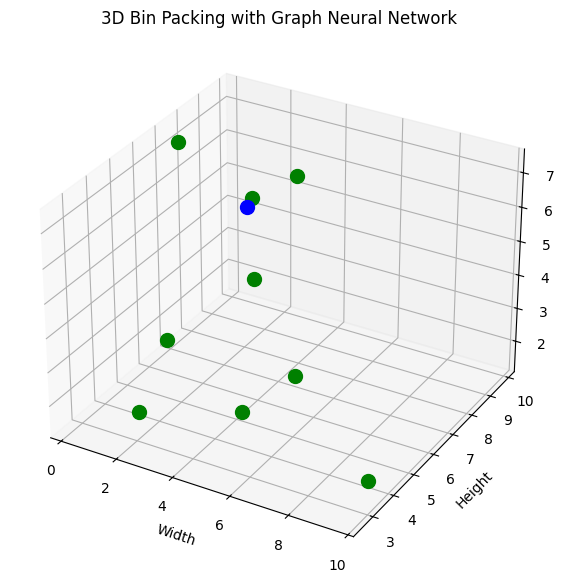

In [16]:
import torch
import torch_geometric
from torch_geometric.nn import GCNConv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Generate random item data (width, height, depth)
num_items = 10
item_dimensions = torch.rand((num_items, 3)) * 10  # Random dimensions between 0 and 10

# Create a graph where each item is a node
# We'll use random connections as edges between the nodes for simplicity
edge_index = torch.randint(0, num_items, (2, num_items * 2))  # Random edge connections between nodes

# Node features: item dimensions (width, height, depth)
x = item_dimensions  # Each node feature is an item dimension

# Create a simple Graph Neural Network model
class GNN(torch.nn.Module):
    def __init__(self):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(3, 16)  # 3 features (width, height, depth) -> 16 hidden units
        self.conv2 = GCNConv(16, 3)  # Output 3 classes (bins)

    def forward(self, x, edge_index):
        x = torch.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return x

# Initialize the GNN model and optimizer
model = GNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training the model (for simplicity, we use random targets for bins)
# In a real-world case, targets would be the desired bin assignments
target = torch.randint(0, 3, (num_items,))  # Random bin assignments (0, 1, 2)

# Training loop
for epoch in range(100):
    optimizer.zero_grad()
    out = model(x, edge_index)  # Forward pass
    loss = torch.nn.functional.cross_entropy(out, target)  # Loss based on bin assignment
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item()}")

# Visualize the result: Show the 3D positions of items and their predicted bin assignments
out = model(x, edge_index)
predicted_bins = out.argmax(dim=1)  # Predicted bin assignments

# Plotting the results
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

bin_colors = ['r', 'g', 'b']  # Colors for different bins

# Plot each item in the 3D space with color corresponding to its predicted bin
for i in range(num_items):
    ax.scatter(item_dimensions[i, 0], item_dimensions[i, 1], item_dimensions[i, 2], 
               color=bin_colors[predicted_bins[i].item()], s=100)

# Labels and title
ax.set_xlabel('Width')
ax.set_ylabel('Height')
ax.set_zlabel('Depth')
ax.set_title('3D Bin Packing with Graph Neural Network')

plt.show()



Epoch 0: Loss = 2.5529606342315674
Epoch 10: Loss = 1.186290979385376
Epoch 20: Loss = 0.9396758079528809
Epoch 30: Loss = 0.9346653819084167
Epoch 40: Loss = 0.9217527508735657
Epoch 50: Loss = 0.8983974456787109
Epoch 60: Loss = 0.8815511465072632
Epoch 70: Loss = 0.8688911199569702
Epoch 80: Loss = 0.8557222485542297
Epoch 90: Loss = 0.8427914381027222


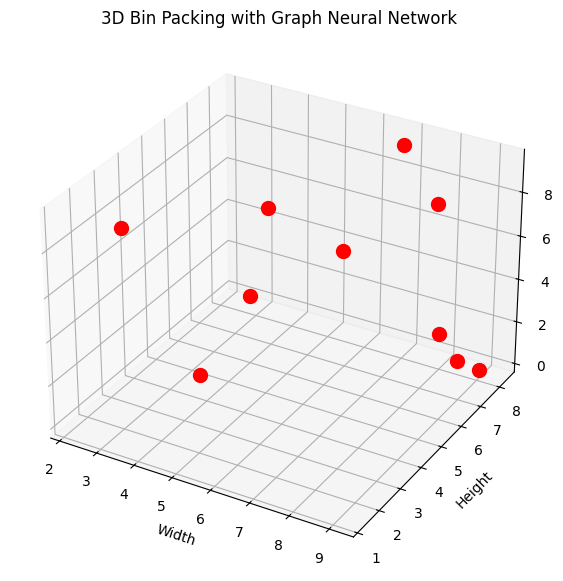

In [17]:
import torch
import torch_geometric
from torch_geometric.nn import GCNConv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Generate random item data (width, height, depth)
num_items = 10
item_dimensions = torch.rand((num_items, 3)) * 10  # Random dimensions between 0 and 10

# Create a graph where each item is a node
# We'll use random connections as edges between the nodes for simplicity
edge_index = torch.randint(0, num_items, (2, num_items * 2))  # Random edge connections between nodes

# Node features: item dimensions (width, height, depth)
x = item_dimensions  # Each node feature is an item dimension

# Create a simple Graph Neural Network model
class GNN(torch.nn.Module):
    def __init__(self):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(3, 16)  # 3 features (width, height, depth) -> 16 hidden units
        self.conv2 = GCNConv(16, 3)  # Output 3 classes (bins)

    def forward(self, x, edge_index):
        x = torch.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return x

# Initialize the GNN model and optimizer
model = GNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training the model (for simplicity, we use random targets for bins)
# In a real-world case, targets would be the desired bin assignments
target = torch.randint(0, 3, (num_items,))  # Random bin assignments (0, 1, 2)

# Training loop
for epoch in range(100):
    optimizer.zero_grad()
    out = model(x, edge_index)  # Forward pass
    loss = torch.nn.functional.cross_entropy(out, target)  # Loss based on bin assignment
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item()}")

# Visualize the result: Show the 3D positions of items and their predicted bin assignments
out = model(x, edge_index)
predicted_bins = out.argmax(dim=1)  # Predicted bin assignments

# Plotting the results
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

bin_colors = ['r', 'g', 'b']  # Colors for different bins

# Set the size of each point based on its bin assignment (larger for bins)
bin_sizes = [100, 200, 300]  # Sizes corresponding to different bins (scale factor)

# Plot each item in the 3D space with color corresponding to its predicted bin and size based on bin
for i in range(num_items):
    ax.scatter(item_dimensions[i, 0], item_dimensions[i, 1], item_dimensions[i, 2], 
               color=bin_colors[predicted_bins[i].item()], s=bin_sizes[predicted_bins[i].item()])

# Labels and title
ax.set_xlabel('Width')
ax.set_ylabel('Height')
ax.set_zlabel('Depth')
ax.set_title('3D Bin Packing with Graph Neural Network')

plt.show()


Example of Combining PennyLane and PyTorch to define a simple quantum neural network (QNN) for a toy problem, such as bin packing optimization:

In [19]:
import pennylane as qml
from pennylane import numpy as np

# Define a quantum device
dev = qml.device("default.qubit", wires=2)

# Define a quantum node
@qml.qnode(dev)
def circuit(inputs):
    # Ensure inputs has at least two elements
    if len(inputs) < 2:
        raise ValueError("Input array must have at least two elements.")

    # Apply rotations based on inputs
    qml.RY(inputs[0], wires=0)
    qml.RY(inputs[1], wires=1)

    # Measuring the state
    return qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1))

# Example input
inputs = np.array([0.5, 1.0])  # Ensure this has at least two elements
print(circuit(inputs))

(tensor(0.87758256, requires_grad=True), tensor(0.54030231, requires_grad=True))


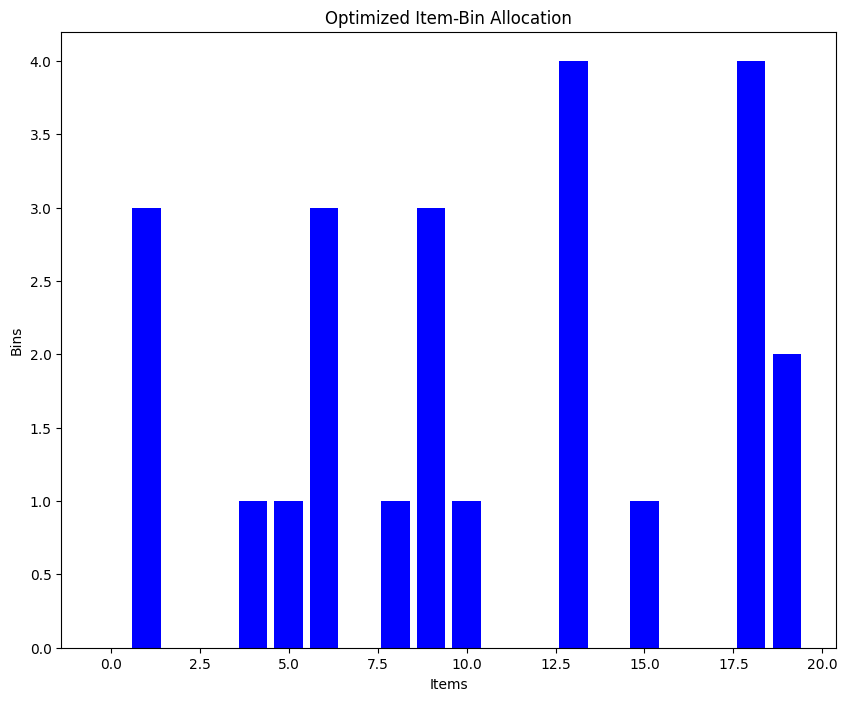

In [21]:
import random  # Import the random module
import matplotlib.pyplot as plt

# Example data
num_bins = 5
num_items = 20

# Visualize the optimized packing (assume optimized results give item-bin allocation)
optimized_packing = [random.choice(range(num_bins)) for _ in range(num_items)]  # For simplicity

# Plotting the item-bin configuration
fig = plt.figure(figsize=(10, 8))
plt.bar(range(num_items), optimized_packing, color='blue')
plt.xlabel('Items')
plt.ylabel('Bins')
plt.title('Optimized Item-Bin Allocation')
plt.show()

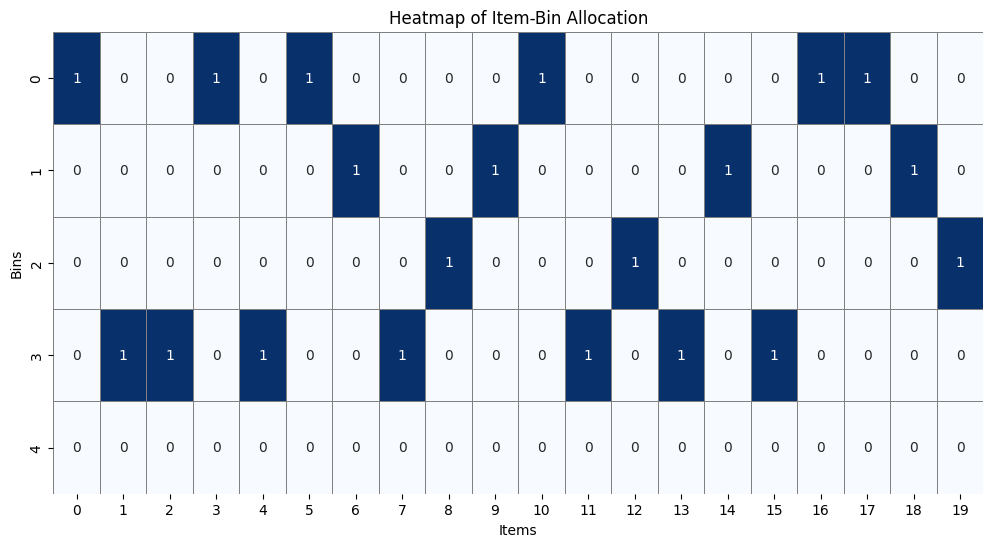

In [23]:
import random  # Import the random module
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example data
num_bins = 5
num_items = 20

# Visualize the optimized packing (assume optimized results give item-bin allocation)
optimized_packing = [random.choice(range(num_bins)) for _ in range(num_items)]  # For simplicity

# Create a 2D array for the heatmap (rows: bins, columns: items)
heatmap_data = np.zeros((num_bins, num_items))
for item, bin_index in enumerate(optimized_packing):
    heatmap_data[bin_index, item] = 1  # Mark the bin where the item is placed

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap="Blues", cbar=False, linewidths=0.5, linecolor='gray')
plt.xlabel('Items')
plt.ylabel('Bins')
plt.title('Heatmap of Item-Bin Allocation')
plt.show()

We will use NetworkX and Matplotlib to create graphs showing how the items (payloads) are placed in the bins.

In [24]:
! pip install networkx

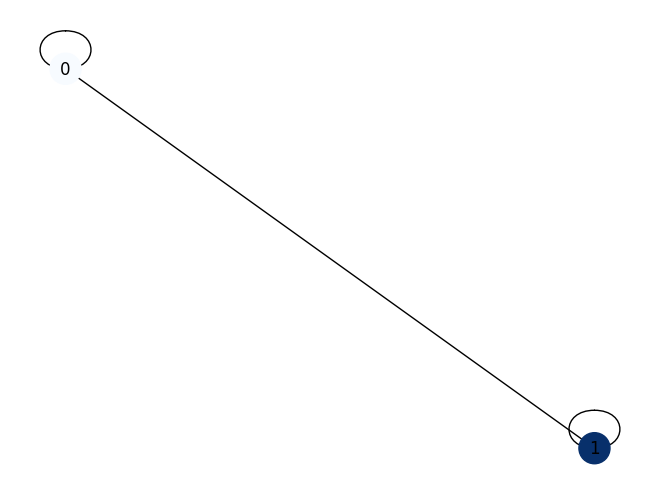

Quantum Circuit Result: 0.0
PyTorch Model Output: tensor([[0.4249],
        [0.6563]], grad_fn=<AddmmBackward0>)


In [25]:
import torch
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pennylane as qml
from pennylane import numpy as np

# Step 1: Define 3D Bin Packing Problem
class BinPackingProblem:
    def __init__(self, bins, payloads):
        self.bins = bins  # List of bin sizes (width, height, depth)
        self.payloads = payloads  # List of payloads (width, height, depth, weight)
        self.graph = nx.Graph()  # Graph to represent the problem

    def add_payloads_to_graph(self):
        # Add each payload as a node to the graph
        for i, payload in enumerate(self.payloads):
            self.graph.add_node(i, label=f"Payload {i}", size=payload['size'], weight=payload['weight'])

    def add_edges_to_graph(self):
        # Add edges between payloads and bins (depending on constraints)
        for i, payload in enumerate(self.payloads):
            for j, bin in enumerate(self.bins):
                if self.is_fitting(payload, bin):
                    self.graph.add_edge(i, j, weight=self.calculate_fitting_score(payload, bin))

    def is_fitting(self, payload, bin):
        # Check if the payload fits in the bin (simple check on dimensions)
        return all(payload['size'][k] <= bin['size'][k] for k in range(3))

    def calculate_fitting_score(self, payload, bin):
        # A simple heuristic score based on the size of the payload and bin
        return np.prod(bin['size']) - np.prod(payload['size'])

    def visualize(self):
        # Draw the graph with payloads as nodes
        node_colors = [self.graph.nodes[node]['weight'] for node in self.graph.nodes]
        nx.draw(self.graph, with_labels=True, node_size=500, node_color=node_colors, cmap=plt.cm.Blues)
        plt.show()


# Step 2: PennyLane Quantum Circuit for Optimization
dev = qml.device('default.qubit', wires=4)

@qml.qnode(dev)
def quantum_circuit(params):
    # Apply a quantum optimization algorithm like QAOA
    qml.Hadamard(wires=0)
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliZ(0))

# Step 3: PyTorch Model for Simulation
class BinPackingModel(torch.nn.Module):
    def __init__(self):
        super(BinPackingModel, self).__init__()
        # Simple feed-forward neural network to simulate packing optimization
        self.fc1 = torch.nn.Linear(3, 128)
        self.fc2 = torch.nn.Linear(128, 64)
        self.fc3 = torch.nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Step 4: Run the optimization and visualize
bins = [{'size': [10, 10, 10]}, {'size': [8, 8, 8]}]  # Example bins
payloads = [{'size': [4, 4, 4], 'weight': 1}, {'size': [6, 6, 6], 'weight': 2}]  # Example payloads

bin_packing_problem = BinPackingProblem(bins, payloads)
bin_packing_problem.add_payloads_to_graph()
bin_packing_problem.add_edges_to_graph()

# Visualize the graph
bin_packing_problem.visualize()

# Step 5: Apply the Quantum Optimization (QAOA) and Simulate with PyTorch
params = np.random.uniform(0, np.pi, size=2)
result = quantum_circuit(params)

print(f"Quantum Circuit Result: {result}")

# Now using PyTorch to simulate a model for the bin packing problem
model = BinPackingModel()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Dummy input data (representing payload sizes)
input_data = torch.tensor([[4, 4, 4], [6, 6, 6]], dtype=torch.float32)

# Forward pass
output = model(input_data)
print(f"PyTorch Model Output: {output}")

# Update model parameters
loss = output.mean()  # Example loss function
optimizer.zero_grad()
loss.backward()
optimizer.step()

# Run and optimize the packing solution with quantum and classical optimization



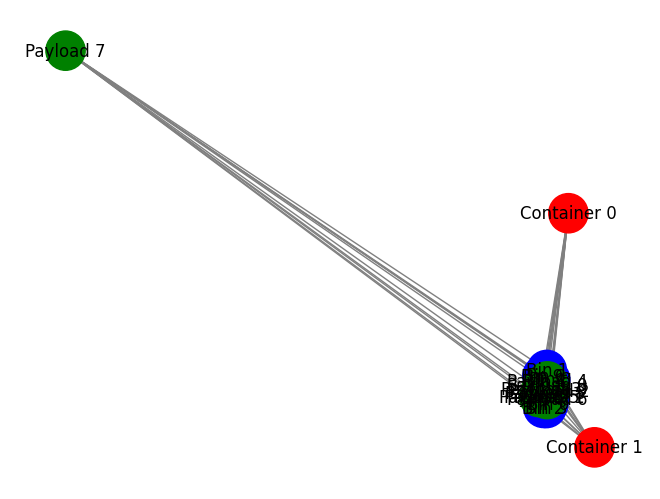

Quantum Circuit Result: 0.0
PyTorch Model Output: tensor([[-0.0349],
        [-0.0089],
        [ 0.0159],
        [ 0.0407],
        [ 0.0047]], grad_fn=<AddmmBackward0>)


In [28]:
import torch
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pennylane as qml
from pennylane import numpy as np

# Step 1: Define 3D Bin Packing Problem with 10 Bins and 2 Containers
class BinPackingProblem:
    def __init__(self, containers, bins, payloads):
        self.containers = containers  # Large containers
        self.bins = bins  # 10 bins
        self.payloads = payloads  # Items to be packed
        self.graph = nx.Graph()  # Graph representation

    def add_bins_to_graph(self):
        for i, bin in enumerate(self.bins):
            self.graph.add_node(f"Bin {i}", size=bin['size'], weight=bin['weight'], color="blue")

    def add_payloads_to_graph(self):
        for i, payload in enumerate(self.payloads):
            self.graph.add_node(f"Payload {i}", size=payload['size'], weight=payload['weight'], color="green")

    def add_edges(self):
        for i, payload in enumerate(self.payloads):
            for j, bin in enumerate(self.bins):
                if self.is_fitting(payload, bin):
                    self.graph.add_edge(f"Payload {i}", f"Bin {j}", weight=self.calculate_fitting_score(payload, bin))

        for i, bin in enumerate(self.bins):
            for j, container in enumerate(self.containers):
                if self.is_fitting(bin, container):
                    self.graph.add_edge(f"Bin {i}", f"Container {j}", weight=1)

    def is_fitting(self, item, container):
        # Ensure item fits within the container dimensions
        return all(item['size'][k] <= container['size'][k] for k in range(3))

    def calculate_fitting_score(self, item, container):
        # Calculate a score based on the remaining space in the container
        return np.prod(container['size']) - np.prod(item['size'])

    def visualize(self):
        pos = nx.spring_layout(self.graph)  
        colors = [self.graph.nodes[node].get('color', "red") for node in self.graph.nodes]

        # Removed cmap since node_color uses categorical colors
        nx.draw(self.graph, pos, with_labels=True, node_size=800, node_color=colors, edge_color='gray')
        plt.show()


# Step 2: PennyLane Quantum Circuit for Optimization
dev = qml.device('default.qubit', wires=4)

@qml.qnode(dev)
def quantum_circuit(params):
    qml.Hadamard(wires=0)
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliZ(0))

# Step 3: PyTorch Model for Simulation
class BinPackingModel(torch.nn.Module):
    def __init__(self):
        super(BinPackingModel, self).__init__()
        self.fc1 = torch.nn.Linear(3, 128)
        self.fc2 = torch.nn.Linear(128, 64)
        self.fc3 = torch.nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Step 4: Define Data for 2 Containers, 10 Bins, and Payloads
containers = [{'size': [50, 50, 50]} for _ in range(2)]  # Two large containers

bins = [{'size': [10, 10, 10], 'weight': 10} for _ in range(10)]  # 10 bins

payloads = [
    {'size': [5, 5, 5], 'weight': 2},
    {'size': [6, 6, 6], 'weight': 3},
    {'size': [7, 7, 7], 'weight': 4},
    {'size': [8, 8, 8], 'weight': 5},
    {'size': [5, 6, 7], 'weight': 3},
    {'size': [9, 9, 9], 'weight': 6},
    {'size': [6, 6, 6], 'weight': 3},
    {'size': [10, 10, 10], 'weight': 7},
    {'size': [4, 4, 4], 'weight': 2},
    {'size': [3, 3, 3], 'weight': 1}
]  # 10 payloads

# Step 5: Create and Visualize Problem Graph
bin_packing_problem = BinPackingProblem(containers, bins, payloads)
bin_packing_problem.add_bins_to_graph()
bin_packing_problem.add_payloads_to_graph()
bin_packing_problem.add_edges()

bin_packing_problem.visualize()

# Step 6: Apply Quantum Optimization (QAOA) and Simulate with PyTorch
params = np.random.uniform(0, np.pi, size=2)
result = quantum_circuit(params)

print(f"Quantum Circuit Result: {result}")

# Using PyTorch to simulate a model for bin packing
model = BinPackingModel()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Dummy input data (representing payload sizes)
input_data = torch.tensor([[5, 5, 5], [6, 6, 6], [7, 7, 7], [8, 8, 8], [5, 6, 7]], dtype=torch.float32)

# Forward pass
output = model(input_data)
print(f"PyTorch Model Output: {output}")

# Update model parameters
loss = output.mean()
optimizer.zero_grad()
loss.backward()
optimizer.step()

In [29]:
! pip install pyvis

  Using cached pyvis-0.3.2-py3-none-any.whl.metadata (1.7 kB)
Using cached pyvis-0.3.2-py3-none-any.whl (756 kB)


In [30]:
! pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 1.3 MB/s eta 0:00:0000:0100:01m


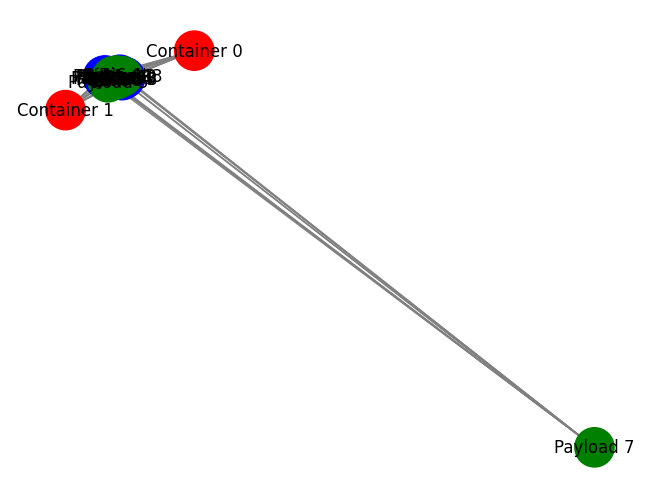

Quantum Circuit Result: 0.0
PyTorch Model Output: tensor([[-0.3919],
        [-0.4991],
        [-0.6076],
        [-0.7159],
        [-0.4279]], grad_fn=<AddmmBackward0>)


In [31]:
import torch
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pennylane as qml
from pennylane import numpy as np

# Step 1: Define 3D Bin Packing Problem with 10 Bins and 2 Containers
class BinPackingProblem:
    def __init__(self, containers, bins, payloads):
        self.containers = containers  # Large containers
        self.bins = bins  # 10 bins
        self.payloads = payloads  # Items to be packed
        self.graph = nx.Graph()  # Graph representation

    def add_bins_to_graph(self):
        for i, bin in enumerate(self.bins):
            self.graph.add_node(f"Bin {i}", size=bin['size'], weight=bin['weight'], color="blue")

    def add_payloads_to_graph(self):
        for i, payload in enumerate(self.payloads):
            self.graph.add_node(f"Payload {i}", size=payload['size'], weight=payload['weight'], color="green")

    def add_edges(self):
        for i, payload in enumerate(self.payloads):
            for j, bin in enumerate(self.bins):
                if self.is_fitting(payload, bin):
                    self.graph.add_edge(f"Payload {i}", f"Bin {j}", weight=self.calculate_fitting_score(payload, bin))

        for i, bin in enumerate(self.bins):
            for j, container in enumerate(self.containers):
                if self.is_fitting(bin, container):
                    self.graph.add_edge(f"Bin {i}", f"Container {j}", weight=1)

    def is_fitting(self, item, container):
        # Ensure item fits within the container dimensions
        return all(item['size'][k] <= container['size'][k] for k in range(3))

    def calculate_fitting_score(self, item, container):
        # Calculate a score based on the remaining space in the container
        return np.prod(container['size']) - np.prod(item['size'])

    def visualize(self):
        pos = nx.spring_layout(self.graph)  
        colors = [self.graph.nodes[node].get('color', "red") for node in self.graph.nodes]

        # Removed cmap since node_color uses categorical colors
        nx.draw(self.graph, pos, with_labels=True, node_size=800, node_color=colors, edge_color='gray')
        plt.show()


# Step 2: PennyLane Quantum Circuit for Optimization
dev = qml.device('default.qubit', wires=4)

@qml.qnode(dev)
def quantum_circuit(params):
    qml.Hadamard(wires=0)
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliZ(0))

# Step 3: PyTorch Model for Simulation
class BinPackingModel(torch.nn.Module):
    def __init__(self):
        super(BinPackingModel, self).__init__()
        self.fc1 = torch.nn.Linear(3, 128)
        self.fc2 = torch.nn.Linear(128, 64)
        self.fc3 = torch.nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Step 4: Define Data for 2 Containers, 10 Bins, and Payloads
containers = [{'size': [50, 50, 50]} for _ in range(2)]  # Two large containers

bins = [{'size': [10, 10, 10], 'weight': 10} for _ in range(10)]  # 10 bins

payloads = [
    {'size': [5, 5, 5], 'weight': 2},
    {'size': [6, 6, 6], 'weight': 3},
    {'size': [7, 7, 7], 'weight': 4},
    {'size': [8, 8, 8], 'weight': 5},
    {'size': [5, 6, 7], 'weight': 3},
    {'size': [9, 9, 9], 'weight': 6},
    {'size': [6, 6, 6], 'weight': 3},
    {'size': [10, 10, 10], 'weight': 7},
    {'size': [4, 4, 4], 'weight': 2},
    {'size': [3, 3, 3], 'weight': 1}
]  # 10 payloads

# Step 5: Create and Visualize Problem Graph
bin_packing_problem = BinPackingProblem(containers, bins, payloads)
bin_packing_problem.add_bins_to_graph()
bin_packing_problem.add_payloads_to_graph()
bin_packing_problem.add_edges()

bin_packing_problem.visualize()

# Step 6: Apply Quantum Optimization (QAOA) and Simulate with PyTorch
params = np.random.uniform(0, np.pi, size=2)
result = quantum_circuit(params)

print(f"Quantum Circuit Result: {result}")

# Using PyTorch to simulate a model for bin packing
model = BinPackingModel()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Dummy input data (representing payload sizes)
input_data = torch.tensor([[5, 5, 5], [6, 6, 6], [7, 7, 7], [8, 8, 8], [5, 6, 7]], dtype=torch.float32)

# Forward pass
output = model(input_data)
print(f"PyTorch Model Output: {output}")

# Update model parameters
loss = output.mean()
optimizer.zero_grad()
loss.backward()
optimizer.step()

In [32]:
from pyvis.network import Network

def visualize_with_pyvis(self):
    net = Network(notebook=True, height="750px", width="100%", bgcolor="#222222", font_color="white")
    
    # Add nodes with attributes
    for node in self.graph.nodes():
        data = self.graph.nodes[node]
        size = 25
        if 'Bin' in node:
            size = 30
        elif 'Container' in node:
            size = 40
            
        label = f"{node}\nWeight: {data.get('weight', 'N/A')}"
        title = f"Size: {data.get('size', 'N/A')}"
        net.add_node(node, label=label, title=title, color=data.get('color', 'red'), size=size)
    
    # Add edges with weights
    for source, target, data in self.graph.edges(data=True):
        width = data.get('weight', 1) / 100 + 1  # Scale edge width
        net.add_edge(source, target, title=f"Weight: {data.get('weight', 1)}", width=width)
    
    # Configure physics options for better layout
    net.toggle_physics(True)
    net.show_buttons(filter_=['physics'])
    net.set_options("""
    {
      "physics": {
        "barnesHut": {
          "gravitationalConstant": -4000,
          "centralGravity": 0.3,
          "springLength": 200
        },
        "minVelocity": 0.75
      }
    }
    """)
    
    # Generate and show the graph
    net.show("bin_packing_visualization.html")

In [34]:
! pip install bokeh

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 963.2 kB/s eta 0:00:00a 0:00:01


In [35]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure, from_networkx
from bokeh.models import Circle, HoverTool, MultiLine, LabelSet, ColumnDataSource
from bokeh.palettes import Category20c, Spectral8

def visualize_with_bokeh(self):
    output_notebook()  # For Jupyter notebooks
    
    # Create plot with tools
    plot = figure(title="Bin Packing Problem Graph", 
                 plot_width=800, plot_height=600,
                 tools="pan,wheel_zoom,box_zoom,reset,save")
    
    # Get layout
    graph_layout = nx.spring_layout(self.graph, scale=1.8)
    
    # Create a networkx graph renderer
    graph_renderer = from_networkx(self.graph, graph_layout)
    
    # Set node attributes
    node_attrs = {}
    for node, data in self.graph.nodes(data=True):
        if 'Bin' in node:
            node_attrs[node] = {'color': 'blue', 'size': 15, 'type': 'bin'}
        elif 'Container' in node:
            node_attrs[node] = {'color': 'red', 'size': 20, 'type': 'container'}
        else:
            node_attrs[node] = {'color': 'green', 'size': 10, 'type': 'payload'}
    
    # Set node colors and sizes
    node_colors = [node_attrs[node]['color'] for node in self.graph.nodes()]
    node_sizes = [node_attrs[node]['size'] for node in self.graph.nodes()]
    
    graph_renderer.node_renderer.glyph = Circle(size='size', fill_color='color')
    graph_renderer.node_renderer.data_source.data['color'] = node_colors
    graph_renderer.node_renderer.data_source.data['size'] = node_sizes
    
    # Set edge attributes
    graph_renderer.edge_renderer.glyph = MultiLine(line_width=1, line_color='gray', line_alpha=0.8)
    
    # Add the graph to the plot
    plot.renderers.append(graph_renderer)
    
    # Add hover tooltips
    node_hover_tool = HoverTool(tooltips=[
        ("ID", "@index"),
        ("Type", "@type"),
        ("Size", "@size"),
        ("Weight", "@weight")
    ])
    plot.add_tools(node_hover_tool)
    
    # Add labels
    x, y = zip(*graph_layout.values())
    node_labels = list(graph_layout.keys())
    source = ColumnDataSource({'x': x, 'y': y, 'name': node_labels})
    labels = LabelSet(x='x', y='y', text='name', source=source, background_fill_color='white', text_font_size='8pt')
    plot.renderers.append(labels)
    
    show(plot)

In [36]:
from mpl_toolkits.mplot3d import Axes3D

def visualize_3d(self):
    # Create 3D figure
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Use a 3D layout
    pos = nx.spring_layout(self.graph, dim=3)
    
    # Draw nodes
    node_xyz = np.array([pos[v] for v in self.graph.nodes()])
    
    # Categorize nodes
    bin_nodes = [n for n in self.graph.nodes() if 'Bin' in n]
    container_nodes = [n for n in self.graph.nodes() if 'Container' in n]
    payload_nodes = [n for n in self.graph.nodes() if 'Payload' in n]
    
    # Extract positions for each category
    bin_xyz = np.array([pos[v] for v in bin_nodes])
    container_xyz = np.array([pos[v] for v in container_nodes])
    payload_xyz = np.array([pos[v] for v in payload_nodes])
    
    # Plot nodes by category
    if len(bin_nodes) > 0:
        ax.scatter(bin_xyz[:, 0], bin_xyz[:, 1], bin_xyz[:, 2], 
                  c='blue', s=200, label='Bins', edgecolors='black', alpha=0.7)
    
    if len(container_nodes) > 0:
        ax.scatter(container_xyz[:, 0], container_xyz[:, 1], container_xyz[:, 2], 
                  c='red', s=300, label='Containers', edgecolors='black', alpha=0.7)
    
    if len(payload_nodes) > 0:
        ax.scatter(payload_xyz[:, 0], payload_xyz[:, 1], payload_xyz[:, 2], 
                  c='green', s=100, label='Payloads', edgecolors='black', alpha=0.7)
    
    # Draw edges
    for u, v in self.graph.edges():
        edge_pos = np.array([pos[u], pos[v]])
        ax.plot(edge_pos[:, 0], edge_pos[:, 1], edge_pos[:, 2], 
               c='gray', alpha=0.5, linewidth=1)
    
    # Add node labels
    for node, (x, y, z) in pos.items():
        ax.text(x, y, z, node, fontsize=8)
    
    # Set axis labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Visualization of Bin Packing Problem')
    plt.legend()
    
    # Set viewing angle
    ax.view_init(elev=30, azim=45)
    plt.tight_layout()
    plt.show()

In [38]:
! pip install holoviews

  Using cached bleach-6.2.0-py3-none-any.whl.metadata (30 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 323.5 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 1.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 1.6 MB/s eta 0:00:00a 0:00:01
Using cached bleach-6.2.0-py3-none-any.whl (163 kB)
  Attempting uninstall: bokeh
    Found existing installation: bokeh 3.7.1
    Uninstalling bokeh-3.7.1:
      Successfully uninstalled bokeh-3.7.1


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
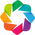

In [39]:
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

def visualize_with_holoviews(self):
    # Assign positions to nodes
    pos = nx.spring_layout(self.graph)
    
    # Convert to holoviews graph
    nodes = [(node, {'x': pos[node][0], 'y': pos[node][1], 
                    'type': 'bin' if 'Bin' in node else 'container' if 'Container' in node else 'payload',
                    'color': self.graph.nodes[node].get('color', 'red'),
                    'size': self.graph.nodes[node].get('weight', 5) * 2,
                    'label': node}) 
             for node in self.graph.nodes()]
    
    edges = [(source, target, {'weight': data.get('weight', 1)}) 
             for source, target, data in self.graph.edges(data=True)]
    
    # Create graph
    g = hv.Graph(((u, v, d) for u, v, d in edges), 
                 nodes=((n, d) for n, d in nodes))
    
    # Style
    graph_opts = opts.Graph(
        width=800, height=600, 
        node_size='size', node_color='color', 
        edge_line_width=1, edge_color='gray', edge_alpha=0.6,
        node_hover_alpha=1.0,
        node_hover_line_color='black',
        inspection_policy='edges',
        tools=['hover', 'tap', 'box_select', 'lasso_select', 'wheel_zoom'],
        node_hover_fill_alpha=1.0,
        xaxis=None, yaxis=None
    )
    
    labels = hv.Labels(g.nodes, ['x', 'y'], 'label')
    
    # Return combined plot
    return (g * labels).opts(
        opts.Labels(text_alpha=0.8, text_font_size='8pt')
    ).opts(graph_opts)

In [ ]:
import graph_tool.all as gt

def visualize_with_graphtool(self):
    # Convert NetworkX graph to graph-tool
    g = gt.Graph(directed=False)
    
    # Add vertices with properties
    v_type = g.new_vertex_property("string")
    v_color = g.new_vertex_property("vector<double>")
    v_size = g.new_vertex_property("double")
    v_label = g.new_vertex_property("string")
    
    # Color mapping
    color_map = {"bin": [0, 0, 1, 0.8],  # Blue for bins
                 "container": [1, 0, 0, 0.8],  # Red for containers
                 "payload": [0, 0.8, 0, 0.8]}  # Green for payloads
    
    # Add vertices
    vertex_map = {}
    for i, node in enumerate(self.graph.nodes()):
        v = g.add_vertex()
        vertex_map[node] = v
        
        if "Bin" in node:
            v_type[v] = "bin"
        elif "Container" in node:
            v_type[v] = "container" 
        else:
            v_type[v] = "payload"
            
        v_color[v] = color_map[v_type[v]]
        v_size[v] = 15 if v_type[v] == "bin" else 20 if v_type[v] == "container" else 10
        v_label[v] = node
    
    # Add edges with weights
    e_weight = g.new_edge_property("double")
    for u, v, data in self.graph.edges(data=True):
        e = g.add_edge(vertex_map[u], vertex_map[v])
        e_weight[e] = data.get('weight', 1)
    
    # Set up the layout
    pos = gt.sfdp_layout(g, cooling_step=0.95, epsilon=1e-2)
    
    # Draw the graph
    gt.graph_draw(g, pos=pos, vertex_color=v_color, vertex_size=v_size, 
                  vertex_text=v_label, vertex_font_size=8,
                  edge_pen_width=gt.prop_to_size(e_weight, mi=1, ma=3),
                  output_size=(800, 800))  # Save or display the graph